# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:**  Nandana Rifqi Irfansyah
- **Email:** nandanarifqiirfansyah@gmail.com
- **ID Dicoding:** nandanarifqii

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan status dan hari peminjaman yang berbeda?
- Bagaimana hubungan antara jam, musim, suhu, kelembaban terhadap pola penggunaan sepeda dalam sehari-hari?


## Import Semua Packages/Library yang Digunakan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import t

**Pada tahap ini, Dilakukan pengimporan semua paket yang diperlukan untuk analisis data:**



*   pandas (pd): Manipulasi dan analisis data.
*   numpy (np): Operasi numerik dan komputasi matematika.
*   matplotlib.pyplot (plt): Visualisasi data dengan Matplotlib.
*  seaborn (sns): Visualisasi data statistik yang lebih mudah.
*   scipy.stats.ttest_ind: Uji t independent antara dua kelompok data.
*   scipy.stats.t: Fungsi distribusi t-Student untuk analisis statistik.

Pengimporan semua paket/library ini sebagai langkah awal sebelum memulai analisis data, karena library tersebut menyediakan fungsi dan alat yang diperlukan untuk memproses, menganalisis, dan memvisualisasikan data dengan efisien.

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca hour.csv menjadi DataFrame
hour_df = pd.read_csv('/content/hour.csv')

# Membaca day.csv menjadi DataFrame
day_df = pd.read_csv('/content/day.csv')


Kemudian pada tahap Gathering Data, diawali dengan pembacaan dua file CSV yaitu hour.csv dan day.csv menggunakan Pandas. Data dari kedua file tersebut dimuat sebagai DataFrame, yaitu hour_df dan day_df. Sehingga setelah menjadi DataFrame memungkinkan untuk melakukan berbagai operasi analisis data seperti pembersihan data, eksplorasi data, visualisasi, dan analisis statistik

### Assessing Data

In [ ]:
# Menampilkan lima baris pertama dari DataFrame hour.csv
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Menampilkan lima baris pertama dari DataFrame day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset ini terdiri dari beberapa jenis data yang dapat diidentifikasi, antara lain:

Data Numerik:

- Temp (Suhu): Merupakan suhu yang dinormalisasi dalam skala Celsius. Nilainya dibagi menjadi 41 (maksimal).
- Atemp (Suhu Perasaan): Menyatakan suhu perasaan yang dinormalisasi dalam skala Celsius. Nilainya dibagi menjadi 50 (maksimal).
- Hum (Kelembaban): Merupakan tingkat kelembaban yang dinormalisasi. Nilainya dibagi menjadi 100 (maksimal).
- Windspeed (Kecepatan Angin): Menunjukkan kecepatan angin yang dinormalisasi. Nilainya dibagi menjadi 67 (maksimal).
- Casual (Pengguna Sepeda Sewaan Kasual): Menyatakan jumlah pengguna sepeda sewaan kasual.
- Registered (Pengguna Sepeda Sewaan Terdaftar): Menunjukkan jumlah pengguna sepeda sewaan yang terdaftar.
- Cnt (Total Peminjaman Sepeda): Merupakan jumlah total sepeda yang disewakan, termasuk pengguna kasual dan terdaftar.

Data Kategorikal:

- Season: Merupakan informasi tentang musim dalam tahun (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- Year (Tahun): Menunjukkan tahun (0: 2011, 1: 2012).
- Month (Bulan): Memberikan informasi tentang bulan dalam setahun (1 hingga 12).
- Hour (Jam): Menunjukkan jam dalam sehari (0 hingga 23).
- Holiday (Hari Libur): Mengindikasikan apakah hari itu merupakan hari libur (1 jika ya, 0 jika tidak).
- Weekday (Hari dalam Seminggu): Menyatakan hari dalam seminggu.
- Workingday (Hari Kerja): Menunjukkan apakah hari itu merupakan hari kerja (1 jika ya, 0 jika tidak).
- Weathersit (Kondisi Cuaca): Memberikan informasi tentang kondisi cuaca (1: Cerah, sedikit awan, sebagian cerah, 2: Berkabut + mendung, berkabut + awan rusak, berkabut + sebagian cerah, berkabut, 3: Hujan ringan, petir, awan terpencar, hujan ringan + awan terpencar, 4: Hujan lebat, hujan es + petir + kabut, salju + kabut).

In [ ]:
# Menampilkan Informasi Data Frame hour.csv
hour_df.info()
print()
# Menampilkan Informasi Data Frame day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex

Dari hasil informasi Data Hour.csv dan Day.csv, ditemukan bahwa kolom 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', dan 'weathersit' memiliki tipe data sebagai data int64 (numerik). Jika ditelisik dari melihat isi data yang ada, atribut-atribut tersebut lebih cocok memiliki tipe data kategorikal. Oleh karena itu nantinya diperlukan transformasi tipe data menggunakan library pandas sehingga dapat mempermudah analisa korelasi data di tahap selanjutnya

In [ ]:
# Mengecek Missing Value Data Frame hour.csv
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari output diatas, dapat diamati bahwa tidak ditemukkan missing value satupun dalam data hour.csv sehingga data dapat dilanjutkan untuk proses asessing missing value selanjutnya pada day.csv

In [ ]:
# Mengecek Missing Value Data Frame day.csv
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Begitupun pada Day.csv, dari output diatas, dapat diamati bahwa tidak ditemukkan missing value dari Data Day. Sehingga dapat dilanjutkan dengan proses pendeteksian outlier pada kedua dataset.

In [ ]:
data_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print('Outlier pada Data Hour :')
for column in data_columns:
    hour_outliers = detect_outliers(hour_df, column)
    print(f'Jumlah outliers kolom {column} (hour_df): {len(hour_outliers)}')

print()
print('Outlier pada Data Day :')
for column in data_columns:
    day_outliers = detect_outliers(day_df, column)
    print(f'Jumlah outliers kolom {column} (day_df): {len(day_outliers)}')

Outlier pada Data Hour :
Jumlah outliers kolom temp (hour_df): 0
Jumlah outliers kolom atemp (hour_df): 0
Jumlah outliers kolom hum (hour_df): 22
Jumlah outliers kolom windspeed (hour_df): 342
Jumlah outliers kolom casual (hour_df): 1192
Jumlah outliers kolom registered (hour_df): 680
Jumlah outliers kolom cnt (hour_df): 505

Outlier pada Data Day :
Jumlah outliers kolom temp (day_df): 0
Jumlah outliers kolom atemp (day_df): 0
Jumlah outliers kolom hum (day_df): 2
Jumlah outliers kolom windspeed (day_df): 13
Jumlah outliers kolom casual (day_df): 44
Jumlah outliers kolom registered (day_df): 0
Jumlah outliers kolom cnt (day_df): 0



Hasil deteksi outlier dilakukan dengan menggunakan metode kuartil. Pertama, kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung untuk setiap kolom data, kemudian rentang interkuartil (IQR) dihitung dengan mengurangi Q1 dari Q3. Setelah itu, batas bawah (lower_bound) dihitung dengan mengurangi 1.5 kali IQR dari Q1, dan batas atas (upper_bound) dihitung dengan menambahkan 1.5 kali IQR dari Q3. Outlier kemudian diidentifikasi sebagai nilai di luar batas bawah dan atas ini.


Dari hasil analisis, terdapat beberapa outlier yang terdeteksi pada kedua set data. Pada data 'hour', outlier ditemukan pada kolom 'hum' sebanyak 22 data, 'windspeed' sebanyak 342 data, 'casual' sebanyak 1.192 data, 'registered' sebanyak 680 data, dan 'cnt' sebanyak 505 data. Sedangkan pada data 'day', outlier terdeteksi pada kolom 'hum' sebanyak 2 data, 'windspeed' sebanyak 13 data, dan 'casual' sebanyak 44 data. Hal ini menunjukkan adanya nilai-nilai ekstrem yang perlu diperhatikan dalam analisis lebih lanjut.

In [ ]:
print('Jumlah Duplikasi Data Hour : ', hour_df.duplicated().sum())
print('Jumlah Duplikasi Data Day  : ',day_df.duplicated().sum())

Jumlah Duplikasi Data Hour :  0
Jumlah Duplikasi Data Day  :  0



Hasil penghitungan Duplikasi menunjukkan bahwa tidak ada duplikasi data yang terdeteksi baik pada dataset 'hour' maupun 'day'. Ini menandakan bahwa setiap entri dalam dataset memiliki keunikan dan tidak ada baris yang sepenuhnya identik dengan baris lainnya. Kondisi ini mengindikasikan kebersihan data yang baik, sehingga memungkinkan analisis yang akurat dan konsisten.

### Cleaning Data


Pada Proyek ini, Untuk menjawab pertanyaan bisnis yang telah ditentukan, dataset yang akan digunakan adalah **Data Hour.csv**. Data ini dipilih karena menyediakan informasi yang lebih terperinci dilengkapi dengan kolom Hour yang mana itu sesuai dengan kebutuhan analisis yang ingin dilakukan daripada menggunakan Data Day.csv. Sehingga berikutnya akan dilanjutkan dalam proses membersihkan data untuk memastikan kualitas data yang diolah menjadi lebih baik tanpa menggunakan Dataset Day.csv

In [ ]:
# Mengubah kolom-kolom ke tipe data kategorikal di hour_df
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[categorical_columns] = hour_df[categorical_columns].astype('category')

# Memeriksa tipe data kolom setelah perubahan
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Kode di atas mengubah beberapa kolom dalam DataFrame hour_df menjadi tipe data kategorikal. Kolom yang diubah mencakup 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', dan 'weathersit'. Setelah perubahan dilakukan, dilakukan pengecekan tipe data kolom menggunakan metode dtypes pada DataFrame. Hasilnya menunjukkan bahwa kolom-kolom yang diubah telah berubah menjadi tipe data kategorikal (category), sedangkan kolom lainnya tetap memiliki tipe data yang sama seperti sebelumnya.

In [ ]:
# Mengubah tipe data kolom "dteday" menjadi datetime di hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Memeriksa tipe data untuk kolom "dteday" di hour_df
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

hour_df["dteday"] :  datetime64[ns]


Langkah di atas mengubah tipe data kolom "dteday" dalam DataFrame hour_df menjadi datetime.Untuk mengubahnya ke tipe data datetime, menggunakan fungsi pd.to_datetime() yang disediakan oleh pustaka pandas. Fungsi ini mengonversi nilai-nilai dalam kolom menjadi tipe data datetime yang sesuai.

Setelah pengubahan, tipe data kolom "dteday" adalah datetime64[ns]. Dalam konteks analisis data, penting untuk memiliki kolom tanggal dengan tipe data datetime karena nantinya dapat memudahkan untuk melakukan operasi yang berkaitan dengan tanggal.

In [ ]:
# Fungsi untuk menangani outlier dengan metode imputasi
def impute_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Imputasi outlier dengan batas atas dan batas bawah
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Imputasi outlier pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt' di hour_df
columns_hour = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
for column in columns_hour:
    impute_outliers(hour_df, column)


Berikutnya adalah membuat dan menjalakan fungsi yang digunakan untuk menangani outlier dengan metode imputasi.Penggunaan metode imputasi untuk menangani outlier dipilih karena metode ini mempertahankan jumlah pengamatan pada dataset yang awalnya ada. Dalam kasus ini, tidak dilakukan penghapusan data outlier secara langsung, yang dapat mengurangi jumlah sampel yang tersedia untuk analisis lebih lanjut. Imputasi memungkinkan untuk mempertahankan ukuran sampel yang konsisten sambil tetap mengurangi dampak outlier pada analisis.

Pertama, fungsi menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang interkuartil (IQR) dari kolom yang ditentukan. Kemudian, batas bawah (lower_bound) dan batas atas (upper_bound) dihitung menggunakan rumus IQR. Setelahnya, outlier pada kolom tersebut diimputasi dengan menggunakan batas atas dan batas bawah yang telah dihitung. Selanjutnya, outlier pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt' di DataFrame hour_df diimputasi menggunakan fungsi yang telah didefinisikan.

In [ ]:
data_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print('Outlier pada Data Hour :')
for column in data_columns:
    hour_outliers = detect_outliers(hour_df, column)
    print(f'Jumlah outliers kolom {column} (hour_df): {len(hour_outliers)}')

Outlier pada Data Hour :
Jumlah outliers kolom temp (hour_df): 0
Jumlah outliers kolom atemp (hour_df): 0
Jumlah outliers kolom hum (hour_df): 0
Jumlah outliers kolom windspeed (hour_df): 0
Jumlah outliers kolom casual (hour_df): 0
Jumlah outliers kolom registered (hour_df): 0
Jumlah outliers kolom cnt (hour_df): 0


Pendeteksian outlier dilakukan menggunakan metode IQR (Interquartile Range) pada kolom-kolom tertentu dalam dataset Hour.csv. Hasilnya menunjukkan bahwa sudah tidak ditemukan kembali outlier yang terdeteksi pada kolom 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', dan 'cnt'. Hal ini menunjukkan bahwa data pada kolom-kolom tersebut berada dalam kisaran nilai yang diharapkan dan tidak memiliki nilai yang ekstrim. Sehingga metode imputasi outlier untuk menangani outlier yang ada sebelumnya, telah berhasil dilakukan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,186.361327
std,5017.0295,0.192556,0.171850,0.192809,0.118197,34.813147,135.351791,171.931168
min,1.0000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000



Output dari fungsi describe() pada DataFrame hour_df menyajikan statistik deskriptif untuk setiap kolom numerik. Informasi yang diberikan meliputi jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (max). Dari output tersebut, dapat dilihat distribusi dan karakteristik dari setiap variabel numerik dalam dataset. Misalnya, untuk kolom 'temp', nilai rata-ratanya adalah sekitar 0.50 dengan standar deviasi sekitar 0.19, menunjukkan variasi yang cukup stabil dalam suhu. Demikian pula, informasi serupa diberikan untuk kolom-kolom lainnya seperti 'atemp', 'hum', 'windspeed', 'casual', 'registered', dan 'cnt', yang memberikan gambaran lebih lanjut tentang distribusi dan sebaran data dalam dataset.

Namun untuk proses eksplorasi selanjutnya, menggunakan rata-rata peminjaman sepeda yang lebih berfokus pada TIpe Peminjam Casual & Registered dan yang dibedakan juga pada Working Day dan Weekend agar dapat menyesuaikan untuk dapat menjawab Pertanyaan bisnis yang telah ditentukan diawal.

In [ ]:
# Menghitung rata-rata peminjaman sepeda casual dan registered pada hari libur
mean_rental_casual_weekend = hour_df[hour_df['holiday'] == 1]['casual'].mean()
mean_rental_registered_weekend = hour_df[hour_df['holiday'] == 1]['registered'].mean()

# Menghitung rata-rata peminjaman sepeda casual dan registered pada hari kerja
mean_rental_casual_workingday = hour_df[hour_df['workingday'] == 1]['casual'].mean()
mean_rental_registered_workingday = hour_df[hour_df['workingday'] == 1]['registered'].mean()

# Print hasil perhitungan
print("Peminjaman Sepeda Hari Kerja :")
print("Rata-rata peminjaman sepeda casual pada hari kerja:", mean_rental_casual_workingday)
print("Rata-rata peminjaman sepeda registered pada hari kerja:", mean_rental_registered_workingday)
print("")
print("Peminjaman Sepeda Hari Libur :")
print("Rata-rata peminjaman sepeda casual pada hari libur:", mean_rental_casual_weekend)
print("Rata-rata peminjaman sepeda registered pada hari libur:", mean_rental_registered_weekend)


Peminjaman Sepeda Hari Kerja :
Rata-rata peminjaman sepeda casual pada hari kerja: 25.26936367467341
Rata-rata peminjaman sepeda registered pada hari kerja: 160.14150863885376

Peminjaman Sepeda Hari Libur :
Rata-rata peminjaman sepeda casual pada hari libur: 36.788
Rata-rata peminjaman sepeda registered pada hari libur: 111.606


Hasil perhitungan tersebut membandingkan rata-rata peminjaman sepeda casual dan registered pada hari libur dan hari kerja. Dari output, dapat dilihat bahwa rata-rata peminjaman sepeda casual dan registered cenderung lebih tinggi pada hari libur daripada pada hari kerja. Rata-rata peminjaman sepeda casual pada hari libur mencapai sekitar 36.8, sementara pada hari kerja hanya sekitar 25.3. Begitu juga dengan peminjaman sepeda registered, yang rata-ratanya sekitar 111.6 pada hari libur dan 160.1 pada hari kerja. Hal ini menunjukkan bahwa tingkat peminjaman sepeda lebih tinggi pada hari-hari libur dibandingkan dengan hari kerja.

In [ ]:
# Memisahkan data menjadi dua kelompok berdasarkan status hari (libur atau kerja)
data_libur = hour_df[hour_df['holiday'] == 1]
data_kerja = hour_df[hour_df['workingday'] == 1]

# Menghitung jumlah peminjaman sepeda pada hari libur dan hari kerja
jumlah_peminjaman_libur = data_libur['cnt'].sum()
jumlah_peminjaman_kerja = data_kerja['cnt'].sum()

# Melakukan uji statistik (t-test) untuk memeriksa perbedaan antara kedua kelompok
statistik, p_value = ttest_ind(data_libur['cnt'], data_kerja['cnt'])

# Interpretasi hasil uji statistik
if p_value < 0.05:
    keputusan = "Menolak hipotesis nol: Terdapat perbedaan signifikan dalam total peminjaman sepeda antara hari libur dan hari kerja."
else:
    keputusan = "Gagal menolak hipotesis nol: Tidak terdapat cukup bukti untuk menyimpulkan adanya perbedaan yang signifikan dalam jumlah peminjaman sepeda antara hari libur dan hari kerja."

# Output hasil uji statistik
print("==== Hipotesis ====")
print("H0 : Tidak ada perbedaan yang signifikan dalam jumlah peminjaman sepeda antara hari libur dan hari kerja.")
print("==== Uji Statistik ====")
print("Statistik:", statistik)
print("Nilai P:", p_value)
print("==== Keputusan ====")
print(keputusan)


==== Hipotesis ====
H0 : Tidak ada perbedaan yang signifikan dalam jumlah peminjaman sepeda antara hari libur dan hari kerja.
==== Uji Statistik ====
Statistik: -4.123696429059455
Nilai P: 3.752774602057506e-05
==== Keputusan ====
Menolak hipotesis nol: Terdapat perbedaan signifikan dalam total peminjaman sepeda antara hari libur dan hari kerja.



Analisis ini terbagi menjadi dua tahap utama. Pertama, data dibagi menjadi dua kelompok berdasarkan status hari, yakni libur dan hari kerja. Dilakukan perhitungan jumlah total peminjaman sepeda pada masing-masing kelompok. Kedua, dilakukan uji statistik menggunakan t-test independen. Tujuan dari uji ini adalah untuk membandingkan rata-rata peminjaman sepeda antara kedua kelompok tersebut. Hasil uji statistik menunjukkan nilai p yang sangat kecil (kurang dari 0.05), sehingga menolak hipotesis nol. Ini mengindikasikan adanya perbedaan signifikan dalam total peminjaman sepeda antara hari libur dan hari kerja. Proses penghitungan statistik uji melibatkan perhitungan nilai t-statistic, yang menggambarkan seberapa besar perbedaan rata-rata antara dua kelompok. Selain itu, nilai p digunakan untuk mengevaluasi signifikansi statistik. Semakin kecil nilai p, semakin kecil kemungkinan bahwa perbedaan yang diamati terjadi karena kesalahan acak, sehingga memperkuat kesimpulan tentang perbedaan yang signifikan antara jumlah peminjaman sepeda pada hari libur dan hari kerja.

In [ ]:
# Menghitung korelasi antara variabel dengan 'count' pada hour_df
correlation_season = hour_df['season'].corr(hour_df['cnt'])
correlation_windspeed = hour_df['windspeed'].corr(hour_df['cnt'])
correlation_temperature = hour_df['temp'].corr(hour_df['cnt'])
correlation_humidity = hour_df['hum'].corr(hour_df['cnt'])
correlation_weathersit = hour_df['weathersit'].corr(hour_df['cnt'])

# Output korelasi
print("Korelasi antara 'season' dan 'count':", correlation_season)
print("Korelasi antara 'windspeed' dan 'count':", correlation_windspeed)
print("Korelasi antara 'temperature' dan 'count':", correlation_temperature)
print("Korelasi antara 'humidity' dan 'count':", correlation_humidity)
print("Korelasi antara 'weathersit' dan 'count':", correlation_weathersit)

Korelasi antara 'season' dan 'count': 0.17972802256974393
Korelasi antara 'windspeed' dan 'count': 0.10090620655538463
Korelasi antara 'temperature' dan 'count': 0.4111330323292246
Korelasi antara 'humidity' dan 'count': -0.3299255394927954
Korelasi antara 'weathersit' dan 'count': -0.14443909283929304


Korelasi Variabel dengan 'Count' (Jumlah Peminjaman Sepeda) pada hour_df:

- Korelasi antara 'season' (Musim) dan 'count' adalah sebesar 0.18, menunjukkan hubungan positif yang lemah antara musim dan jumlah total peminjaman sepeda.

- Korelasi antara 'windspeed' (Kecepatan Angin) dan 'count' adalah sekitar 0.10, menunjukkan hubungan positif yang sangat lemah antara kecepatan angin dan jumlah peminjaman sepeda.

- Korelasi antara 'temperature' (Suhu) dan 'count' adalah sekitar 0.41, menunjukkan hubungan positif yang cukup kuat antara suhu dan jumlah peminjaman sepeda.

- Korelasi antara 'humidity' (Kelembapan) dan 'count' adalah sekitar -0.33, menunjukkan hubungan negatif yang cukup kuat antara kelembaban udara dan jumlah peminjaman sepeda.

- Korelasi antara 'weathersit' (Kondisi Cuaca) dan 'count' adalah sekitar -0.14, menunjukkan hubungan negatif yang lemah antara kondisi cuaca dan jumlah peminjaman sepeda.-

In [ ]:
# Menghitung t-statistic
def calculate_t_statistic(r, N):
    return r * ((N - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)

# Menentukan variabel yang akan diuji
variables = ['season', 'windspeed', 'temp', 'hum', 'weathersit']

# Menentukan tingkat signifikansi alpha
alpha = 0.05

# Looping untuk menghitung t-statistic dan uji statistik untuk setiap variabel
for var in variables:
    r = hour_df['cnt'].corr(hour_df[var])  # Hitung koefisien korelasi
    N = len(hour_df)  # Jumlah sampel
    t_statistic = calculate_t_statistic(r, N)  # Hitung t-statistic
    df = N - 2  # Derajat kebebasan
    critical_t = t.ppf(1 - alpha/2, df)  # Nilai kritis t

    # Output hasil uji statistik
    print(f"Variabel: {var}")
    print(f"Korelasi: {r}")
    print(f"t-statistic: {t_statistic}")
    print(f"Critical t-value: {critical_t}")
    if abs(t_statistic) > critical_t:
        print("Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara", var, "dan 'count'.")
    else:
        print("Hipotesis nol (H0) diterima. Tidak terdapat korelasi antara", var, "dan 'count'.")
    print()

Variabel: season
Korelasi: 0.1797280225697439
t-statistic: 24.084260239475107
Critical t-value: 1.9601005117694967
Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara season dan 'count'.

Variabel: windspeed
Korelasi: 0.10090620655538463
t-statistic: 13.369883418525227
Critical t-value: 1.9601005117694967
Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara windspeed dan 'count'.

Variabel: temp
Korelasi: 0.4111330323292246
t-statistic: 59.45346848697662
Critical t-value: 1.9601005117694967
Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara temp dan 'count'.

Variabel: hum
Korelasi: -0.3299255394927954
t-statistic: -46.071053182054264
Critical t-value: 1.9601005117694967
Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara hum dan 'count'.

Variabel: weathersit
Korelasi: -0.14443909283929304
t-statistic: -19.242005938374025
Critical t-value: 1.9601005117694967
Hipotesis nol (H0) ditolak. Terdapat korelasi signifikan antara weathersit dan '

 Kemudian menggunana analisis t-test untuk menentukan apakah terdapat korelasi yang signifikan antara variabel tertentu (misalnya: season, windspeed, temp, hum, dan weathersit) dengan variabel 'count' (jumlah peminjaman sepeda). Setiap variabel diuji secara terpisah. Pertama, koefisien korelasi antara setiap variabel dan 'count' dihitung. Selanjutnya, t-statistic dihitung menggunakan koefisien korelasi tersebut, jumlah sampel, dan derajat kebebasan. Nilai kritis t juga dihitung menggunakan tingkat signifikansi yang ditentukan sebelumnya.

Hasilnya menunjukkan bahwa untuk setiap variabel, nilai t-statistic lebih besar dari nilai kritis t pada tingkat signifikansi 0.05. Ini berarti hipotesis nol (H0) bahwa tidak ada korelasi antara variabel tersebut dan 'count' ditolak. Dengan demikian, terdapat korelasi yang signifikan antara setiap variabel (season, windspeed, temp, hum, dan weathersit) dengan jumlah peminjaman sepeda ('count').

## Visualization & Explanatory Analysis

### Pertanyaan 1:

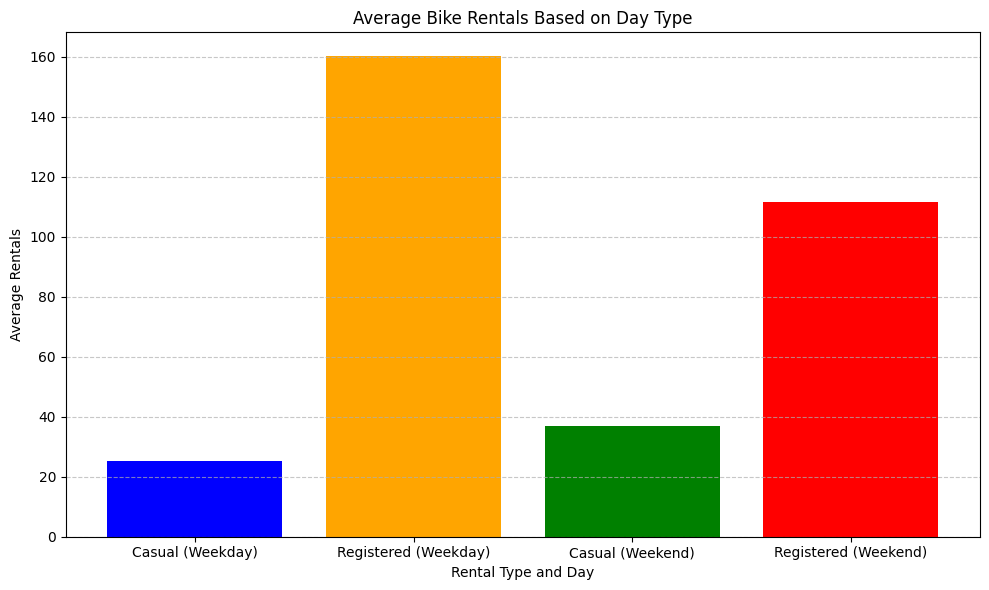

In [ ]:
# Data
categories = ['Casual (Weekday)', 'Registered (Weekday)', 'Casual (Weekend)', 'Registered (Weekend)']
means = [mean_rental_casual_workingday, mean_rental_registered_workingday, mean_rental_casual_weekend, mean_rental_registered_weekend]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, means, color=['blue', 'orange', 'green', 'red'])
plt.title('Average Bike Rentals Based on Day Type')
plt.xlabel('Rental Type and Day')
plt.ylabel('Average Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Sama seperti pada perhitungan sebelumnya yang membandingkan rata-rata peminjaman sepeda casual dan registered pada hari libur dan hari kerja. Dari visualisasi grafik batang, dapat dilihat bahwa rata-rata peminjaman sepeda casual dan registered cenderung lebih tinggi pada hari libur daripada pada hari kerja. Hal ini menunjukkan bahwa tingkat peminjaman sepeda memang lebih tinggi pada hari-hari libur dibandingkan dengan hari kerja.

Oleh karena itu Pihak Rental mempunyai 2 opsi pilihan, dimana dapat meningkatkan Campaign secara Masif untuk membuat Jumlah Peminjaman Sepeda semakin meningkat tajam pada Hari Libur, ataupun Membuat Penyesuaian dan Strategi unik yang dapat membuat orang tertarik untuk meminjam dan menggunakan Sepeda pada Hari Kerja

### Pertanyaan 2:

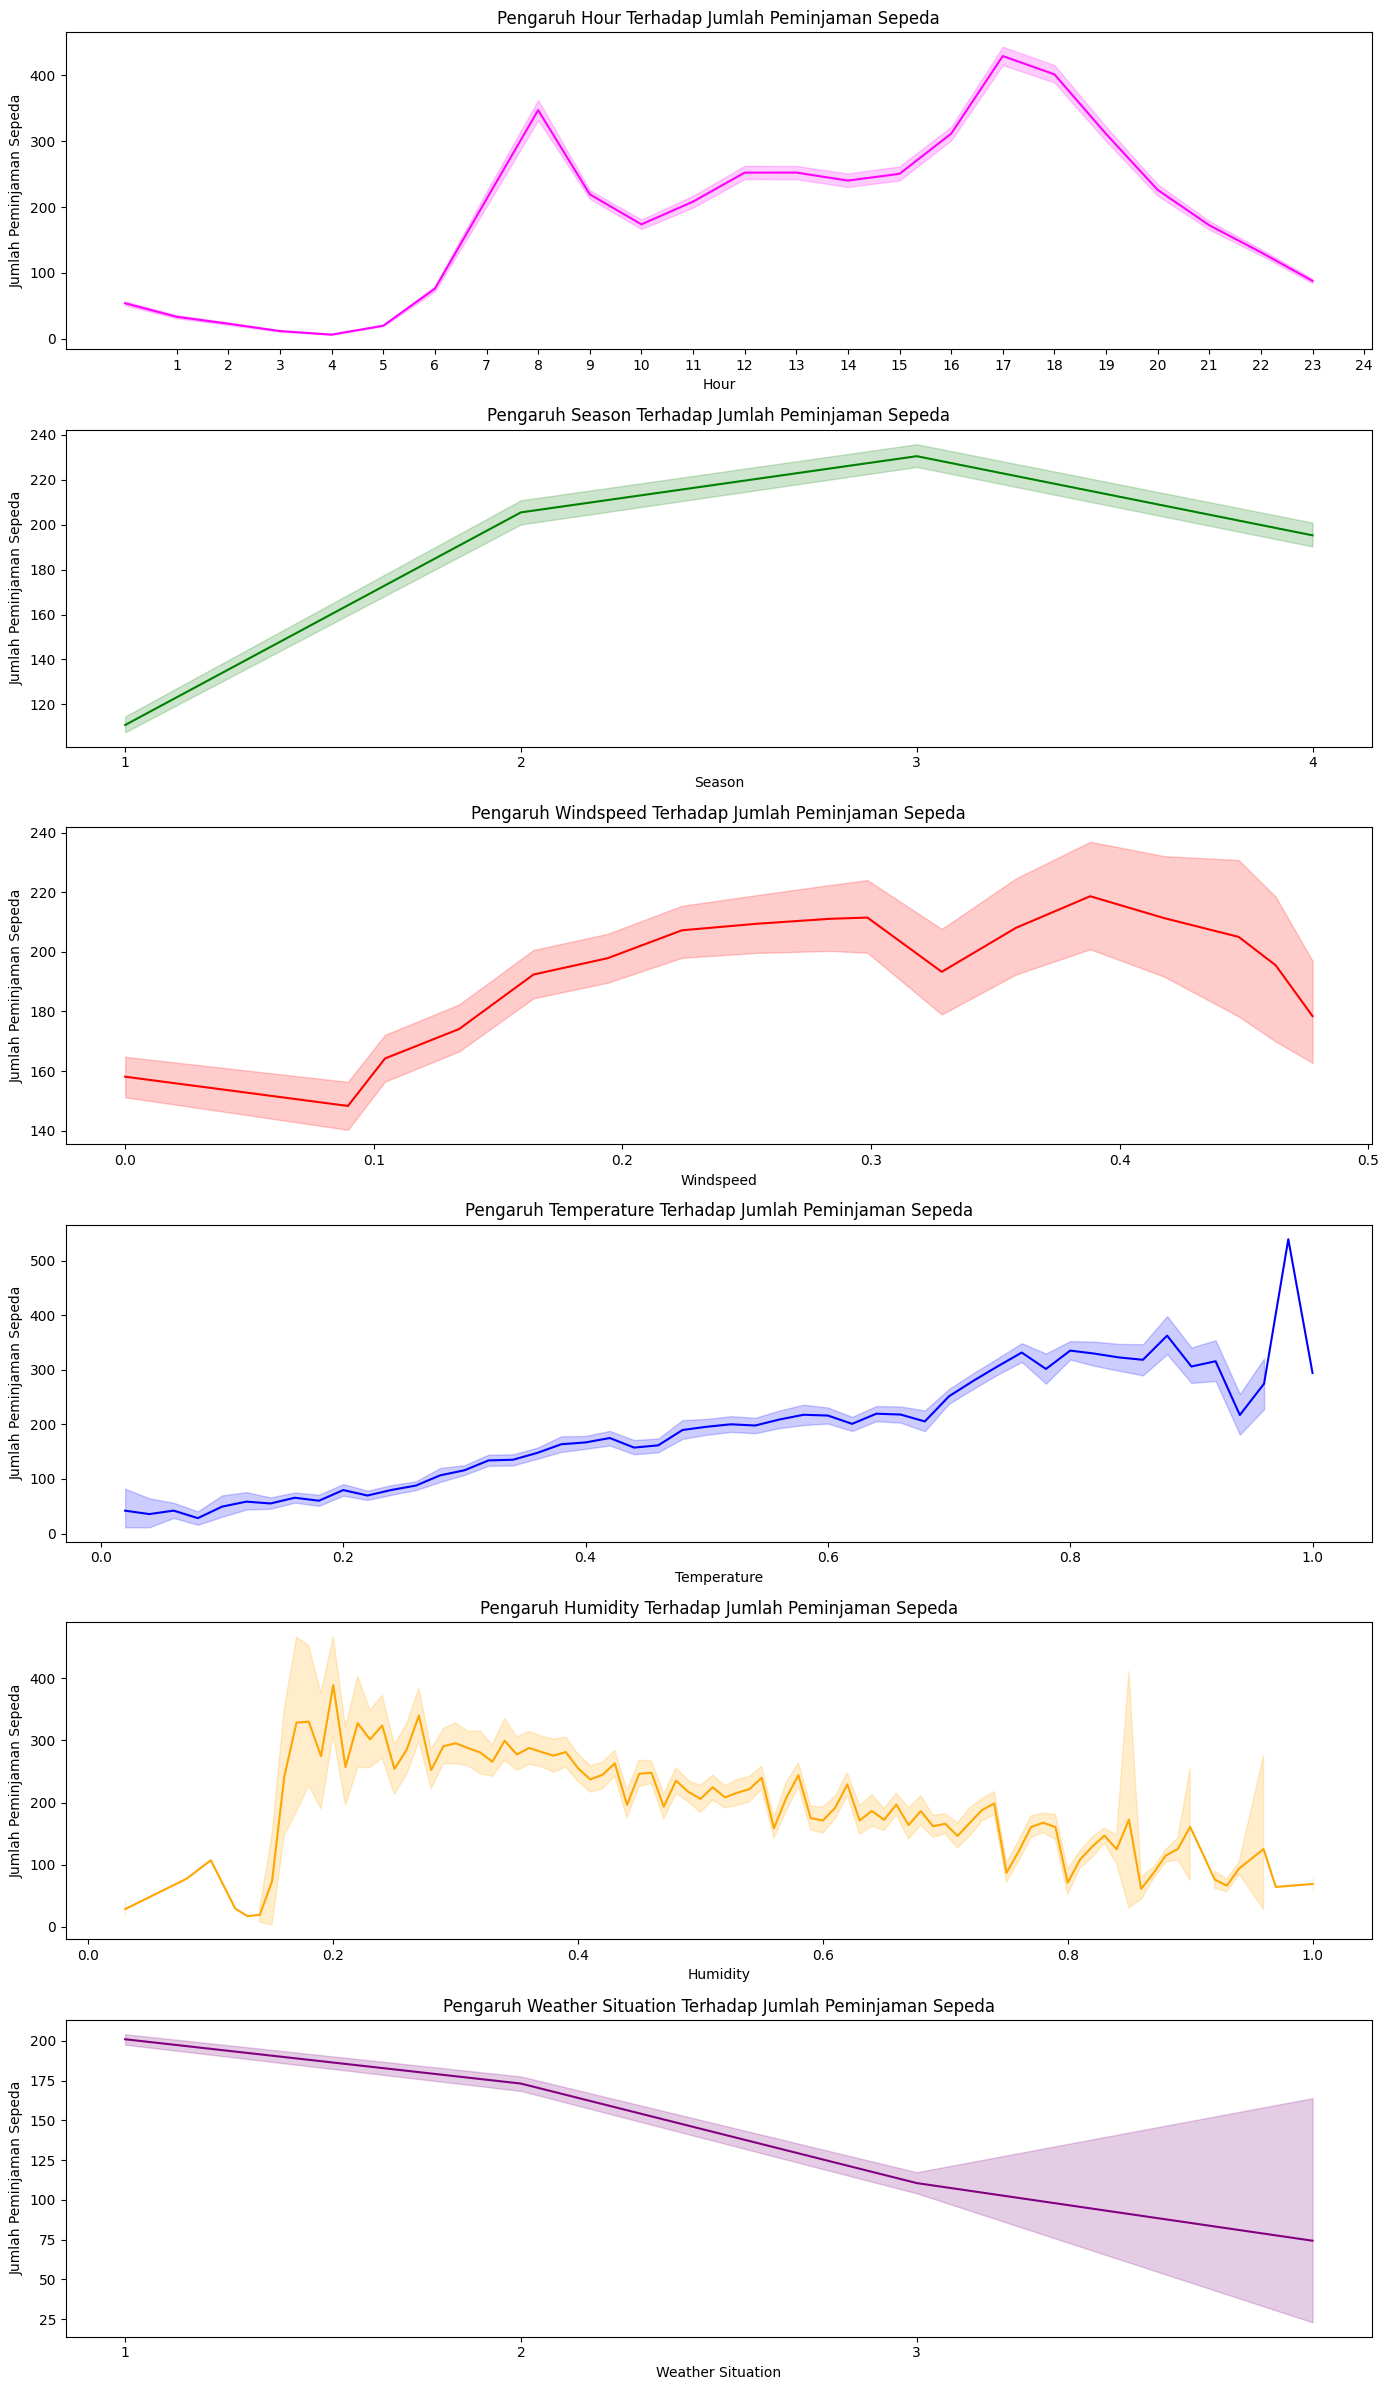

In [ ]:
plt.figure(figsize=(14, 24))

# Plot untuk hour
plt.subplot(6, 1, 1)
sns.lineplot(data=hour_df, x='hr', y='cnt', color='magenta')
plt.title('Pengaruh Hour Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Hour')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 25, 1))  # Menampilkan angka dari 1 hingga 24 di sumbu x

# Plot untuk season
plt.subplot(6, 1, 2)
sns.lineplot(data=hour_df, x='season', y='cnt', color='green')
plt.title('Pengaruh Season Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Season')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 5, 1))  # Menampilkan angka 1-4 di sumbu x untuk musim

# Plot untuk windspeed
plt.subplot(6, 1, 3)
sns.lineplot(data=hour_df, x='windspeed', y='cnt', color='red')
plt.title('Pengaruh Windspeed Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Peminjaman Sepeda')

# Plot untuk temp
plt.subplot(6, 1, 4)
sns.lineplot(data=hour_df, x='temp', y='cnt', color='blue')
plt.title('Pengaruh Temperature Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Peminjaman Sepeda')

# Plot untuk hum
plt.subplot(6, 1, 5)
sns.lineplot(data=hour_df, x='hum', y='cnt', color='orange')
plt.title('Pengaruh Humidity Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Peminjaman Sepeda')

# Plot untuk weathersit
plt.subplot(6, 1, 6)
sns.lineplot(data=hour_df, x='weathersit', y='cnt', color='purple')
plt.title('Pengaruh Weather Situation Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Weather Situation')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 4, 1))  # Menampilkan angka 1-3 di sumbu x untuk kondisi cuaca

plt.tight_layout()
plt.show()

- Pada Visualisasi Pengaruh Jam (Hour) terhadap Jumlah Peminjaman Sepeda, nampak bahwa pada Pukul 7-9 merupakan titik Menaik hingga Puncak serta Pukul 16-18 mencapai Puncak Tertinggi Peminjaman. Sedangkan untu Pukul 11- 15 mengalami Penurunan yang diduga diakibatkan dari Suhu Panas Pada Siang Hari. Sehingga Strategi mungkin dapat ditingkatkan untuk meningkatkan Jumlah peminjaman sepeda pada Siang Hari dan Malam Hari untuk meningkatkan profit. Dan memanfaatkan peluang pada Jam Sejuk dengan memberi promosi ekstra agar jumlah peminjaman semakin melambung tinggi

- Kemudian Pengaruh Season / Musim rupanya cenderung cukup sangat berpengaruh terhadap Jumlah Peminjaman Sepeda. Hal ini terlihat Bahwa Pada Musim 1 Alias Musim Semi sebagai Musim dengan Jumlah Peminjaman Sepeda terendah dibanding Musim Lainnya. Begitupun pada Musim Dingin (4) juga mengalami Penurunan Jumlah Peminjaman Sepeda. Oleh karena itu, mungkin Pihak Rental dapat meningkatkan fitur Sepeda agar lebih hangat atau membuat Campaign yang lebih efektif pada Musim tersebut terutama pada Musim Semi, sehingga dapat meningkatkan profit.

- Kemudian Pengaruh Kenaikan windspeed dan Temperature ternyata cukup berbanding lurus dengan Jumlah Peminjaman Sepeda, sehingga hal ini juga dapat dimanfaatkan oleh Pihak Rental untuk melihat Tanda-tanda Tersebut sebagai usaha untuk meningkatkan Jumlah Peminjaman

- Sementara pada Kenaikan Kelembapan Udara, justru Berbanding Terbalik pada Jumlah Peminjaman Sepeda. Oleh karena itu Pihak Rental Sepeda harus Concern terkait Tingkat Kelembapan pada Sehari-hari bila meningkat, maka kemungkinan besar dapat membuat Jumlah Peminjaman Sepeda menurun. Hal ini dapat dikaji lebih lanjut untuk dapat membuat strategi yang efektif untuk mengatasi fenomena ini.

- Terakhir adalah Pengaruh Situasi Cuaca juga sangat berpengaruh signifikan. Dimana puncak tertinggi Jumlah Peminjaman Sepeda adalah Pada Situasi 1 (Clear, Few clouds, Partly cloudy, Partly cloudy). Situasi Cuaca tersebut memang yang paling terbaik untuk Menaiki sepeda dan berjalan-jalan, sehingga hal wajar ketika Jumlah Peminjaman Sepeda sangat tinggi pada Situasi Cuaca tersebut. Namun Pada Situasi Kedua (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) akan membuat Penurunan Jumlah Peminjaman bahkan semakin menurun drastis pada Hari dimana terjadi Situasi Cuaca ketiga (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). Oleh karena itu Pihak Rental Sepeda harus dapat merancang Strategi yang efektif untuk mengurangi dampak penurunan dari Situasi Cuaca tersebut bila sedang kurang bagus.

## Conclusion

**Conclusion Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan status dan hari peminjaman yang berbeda?**

Berdasarkan data rata-rata peminjaman sepeda pada hari libur dan hari kerja, terlihat perbedaan signifikan dalam pola peminjaman sepeda antara kedua kondisi tersebut. Pada hari libur, rata-rata peminjaman sepeda casual mencapai 36.788, sementara peminjaman sepeda terdaftar mencapai 111.606. Di sisi lain, pada hari kerja, rata-rata peminjaman sepeda casual lebih rendah, yaitu sekitar 25.269, sementara peminjaman terdaftar lebih tinggi, mencapai 160.141.

Analisis ini menyoroti perbedaan signifikan dalam preferensi pengguna sepeda berdasarkan status dan hari peminjaman. Pada hari libur, kontribusi yang lebih besar dari peminjaman casual mungkin terkait dengan kecenderungan orang untuk melakukan perjalanan rekreasi atau santai. Sementara pada hari kerja, dominasi peminjaman terdaftar mungkin mencerminkan penggunaan sepeda yang lebih terkait dengan aktivitas sehari-hari seperti bersekolah atau pergi bekerja.

Dari segi strategi, pemahaman ini memberikan wawasan berharga bagi penyedia layanan sepeda. Pada hari libur, mereka dapat meningkatkan promosi dan ketersediaan sepeda casual untuk memenuhi permintaan rekreasi dan liburan. Di sisi lain, pada hari kerja, fokus dapat diberikan pada layanan terdaftar dengan menawarkan paket langganan atau kemitraan dengan perusahaan untuk memfasilitasi perjalanan sehari-hari bagi karyawan. Dengan demikian, penyesuaian strategis ini dapat membantu meningkatkan pemanfaatan sepeda secara optimal sesuai dengan kebutuhan pengguna pada hari libur maupun hari kerja.




**Conclusion pertanyaan 2 : Bagaimana hubungan antara jam, musim, suhu, kelembaban terhadap pola penggunaan sepeda dalam sehari-hari?**


Analisis korelasi antara variabel cuaca dan jumlah total peminjaman sepeda (cnt) membuka cakrawala baru dalam memahami dampak kondisi cuaca terhadap kebiasaan peminjaman sepeda. Temuan ini menyoroti peran penting suhu, kelembaban udara, dan kecepatan angin dalam memengaruhi pola aktivitas bersepeda.

Suhu menjadi faktor utama yang memengaruhi pola peminjaman sepeda. Semakin tinggi suhu, semakin tinggi juga jumlah peminjaman sepeda, menandakan bahwa cuaca yang hangat mendorong minat bersepeda, terutama pada hari-hari yang cerah.

Namun, kelembaban udara memiliki dampak yang berlawanan. Semakin tinggi kelembaban udara, semakin rendah jumlah peminjaman sepeda karena kondisi cuaca yang kurang nyaman.

Kecepatan angin, meskipun memiliki dampak yang lebih kecil, juga berperan. Meskipun demikian, dalam situasi cuaca ekstrem, seperti cuaca berangin atau buruk, kecepatan angin dapat mempengaruhi minat pengguna untuk bersepeda.

Secara keseluruhan, pemahaman yang baik tentang faktor cuaca dapat membantu dalam perencanaan dan manajemen sepeda sewaan. Strategi dapat mencakup penyesuaian tarif atau promosi berdasarkan prakiraan cuaca, serta investasi dalam infrastruktur yang meningkatkan kenyamanan bersepeda dalam kondisi cuaca tertentu.